In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics  import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


In [2]:
def decimal_to_hms(time):
    seconds = int(time * 3600)
    return str(timedelta(seconds=seconds))

# 20180626

Check for seasonality

In [3]:
df26 = pd.read_csv('20180626.csv')

In [4]:
df26 = df26.rename(columns={'Time [h]': 'time', 'Mass [ng]': 'mass', 'Mean mass [ng]' : 'mean'})
df26 = df26.drop(['mean'], axis = 1)
df26 = df26.dropna()

In [5]:
df26 = df26[df26['mass']>0]

In [6]:
sdc = df26[['mass']].copy()

In [7]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 12)

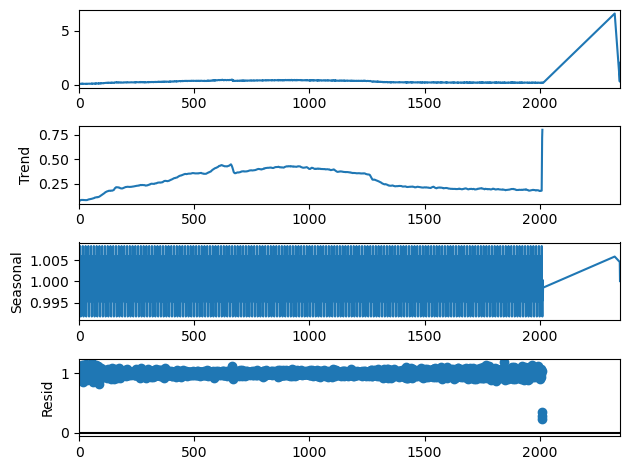

In [8]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

Forecasting

In [9]:
df26['time'] = df26['time'].apply(decimal_to_hms)

In [10]:
df26.set_index('time', inplace=True)

In [11]:
train_size = int(len(df26) * 0.8)
train = df26[:train_size]
test = df26[train_size:]

In [12]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [13]:
#Creating the model
model = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='add')

#Fitting the model into the training data
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [14]:
# Making predictions for the test data
predictions = model_fit.forecast(len(test))

In [15]:
# Evaluating the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


MSE: 0.11108294297278269, RMSE: 0.3332910784476277


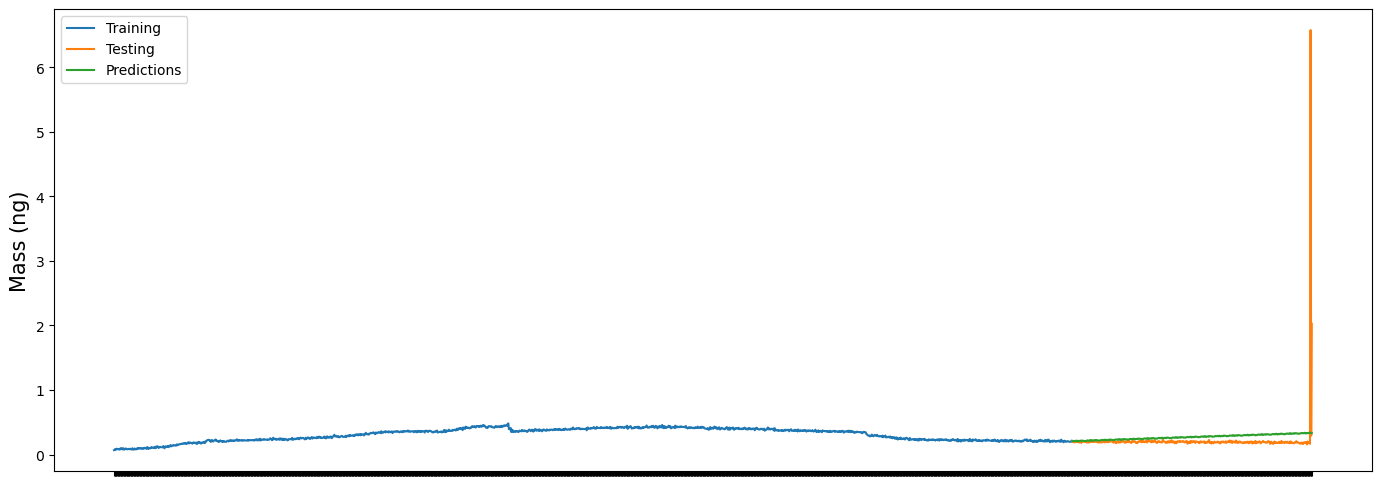

In [16]:
fig, ax = plt.subplots(figsize=(17,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [17]:
forecast = model_fit.forecast(steps=100)
forecast

1614    0.206911
1615    0.211311
1616    0.209010
1617    0.207543
1618    0.206765
          ...   
1709    0.232046
1710    0.237384
1711    0.241784
1712    0.239482
1713    0.238015
Length: 100, dtype: float64

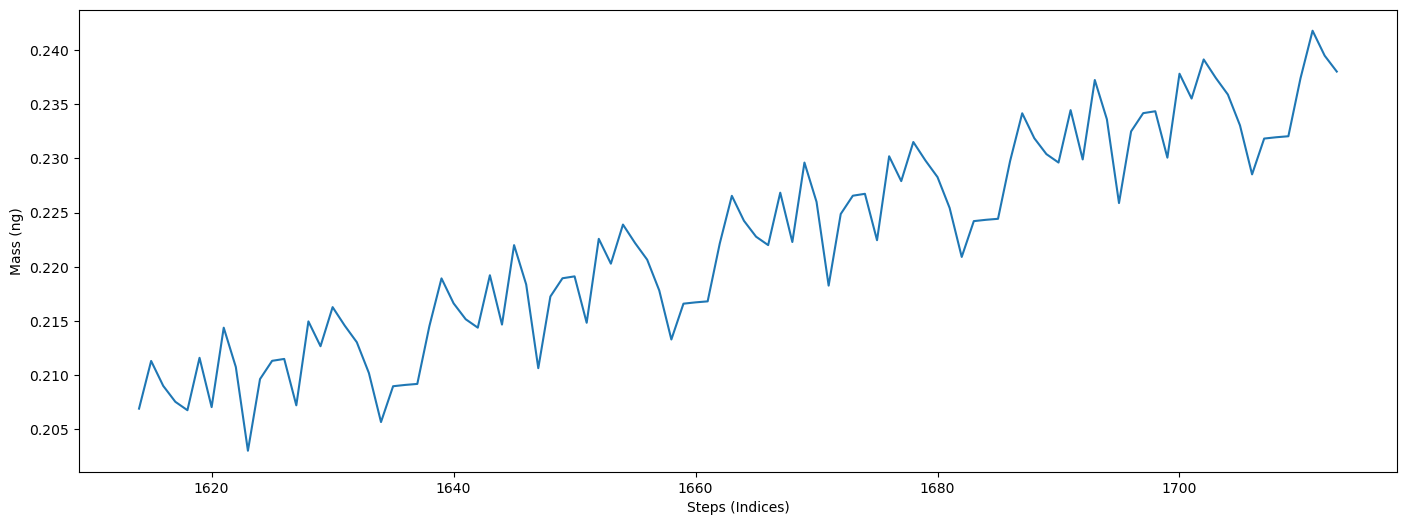

In [18]:
fig, ax = plt.subplots(figsize=(17,6)) 
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.show()

# 20180628

In [19]:
df28 = pd.read_csv('20180628.csv')

In [20]:
df28 = df28.rename(columns={'Time [h]': 'time', 'Mass [ng]': 'mass', 'Mean mass [ng]' : 'mean'})
df28 = df28.drop(['mean'], axis = 1)
df28 = df28.dropna()


In [21]:
df28['time'] = df28['time'].apply(decimal_to_hms)

In [22]:
df28.set_index('time', inplace=True)

In [23]:
train_size = int(len(df28) * 0.8)
train = df28[:train_size]
test = df28[train_size:]

In [24]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [25]:
# Creating the model
model = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='add')

# Fitting the model to the training data
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [26]:
# Make predictions for the test data
predictions = model_fit.forecast(len(test))

In [27]:
# Evaluate 
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


MSE: 0.15438240160348007, RMSE: 0.3929152600796768


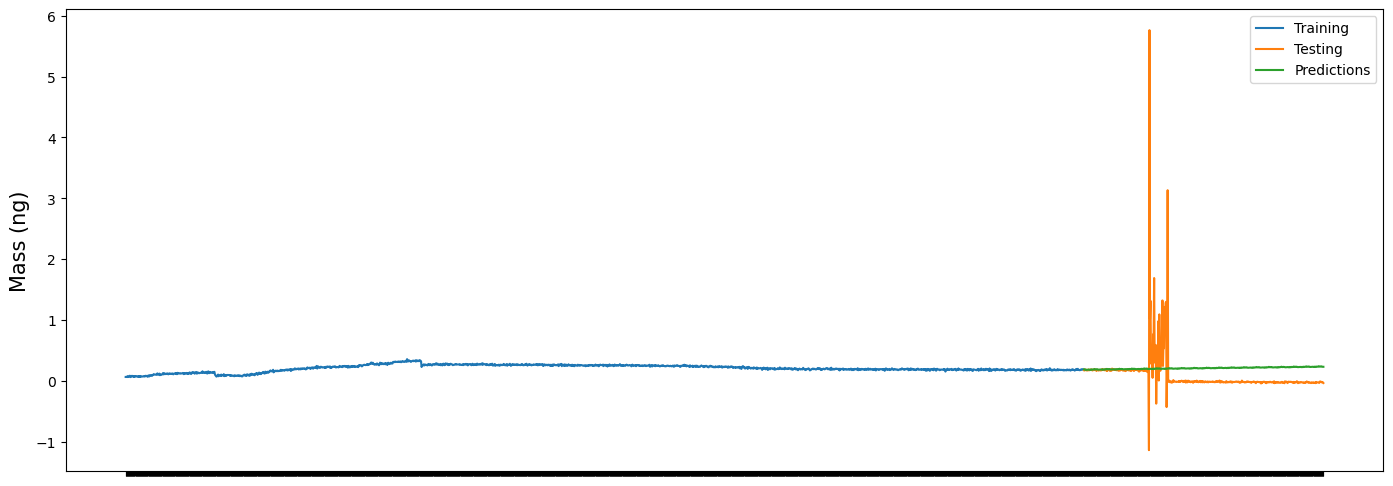

In [28]:
fig, ax = plt.subplots(figsize=(17,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [29]:
forecast = model_fit.forecast(steps=100)
forecast

1846    0.186141
1847    0.181116
1848    0.184456
1849    0.180291
1850    0.178389
          ...   
1941    0.193717
1942    0.196526
1943    0.191501
1944    0.194841
1945    0.190676
Length: 100, dtype: float64

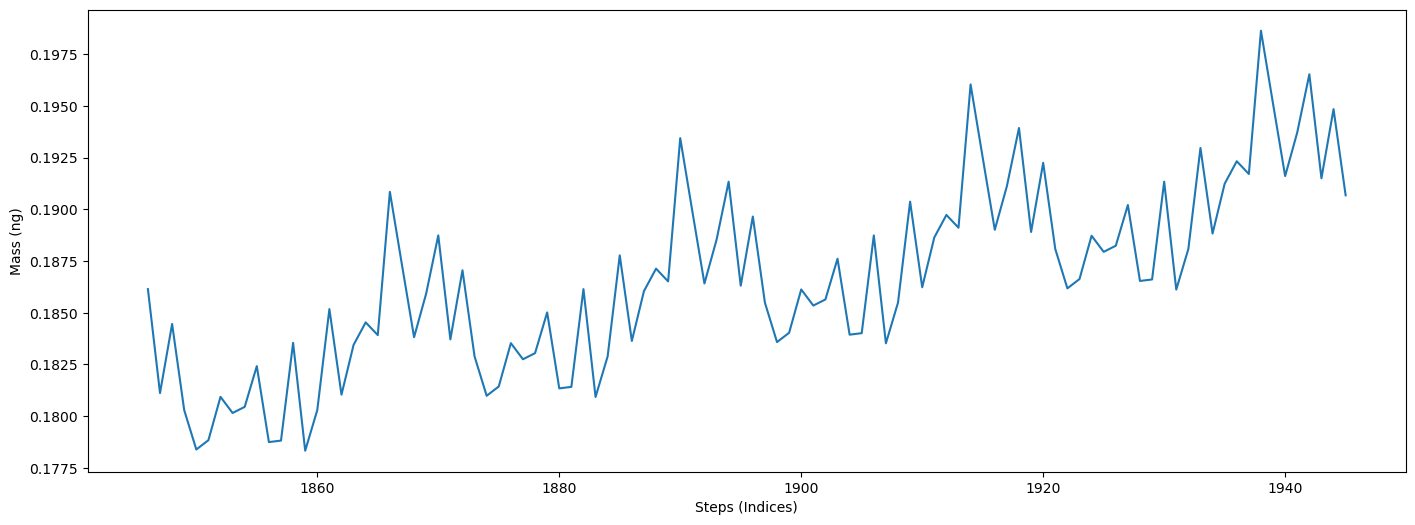

In [30]:
fig, ax = plt.subplots(figsize=(17,6)) 
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.show()

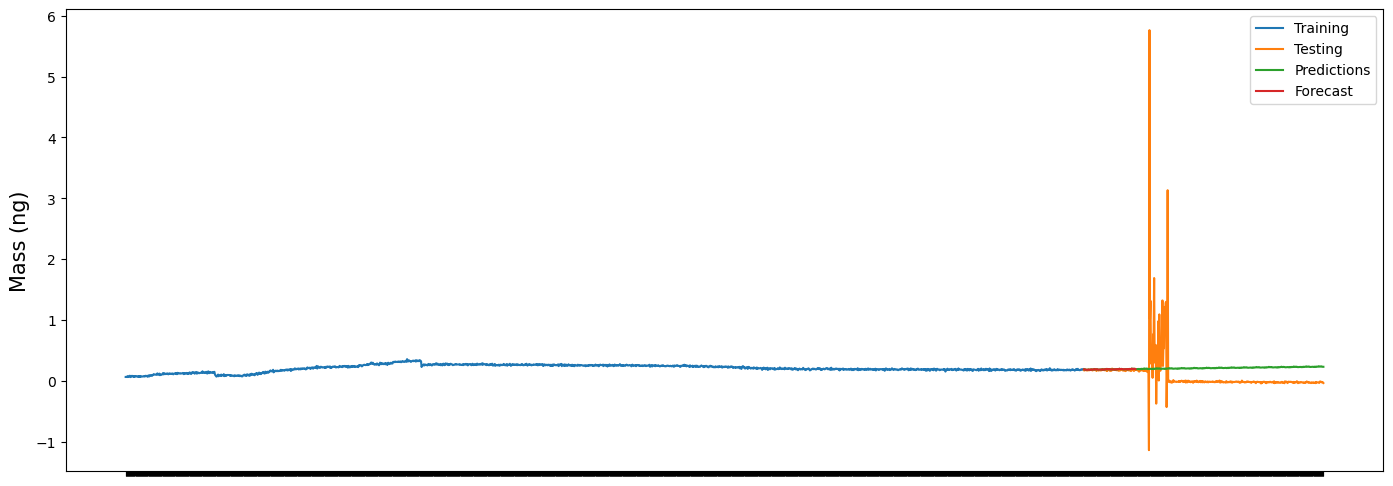

In [31]:
fig, ax = plt.subplots(figsize=(17,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

# 20180703

In [32]:
df703 = pd.read_csv('20180703.csv')

In [33]:
df703 = df703.rename(columns={'Time [h]': 'time', 'Mass [ng]': 'mass', 'Mean mass [ng]' : 'mean'})
df703 = df703.drop(['mean'], axis = 1)
df703 = df703.dropna()


In [34]:
df703['time'] = df703['time'].apply(decimal_to_hms)

In [35]:
df703.set_index('time', inplace=True)

In [36]:
train_size = int(len(df703) * 0.8)
train = df703[:train_size]
test = df703[train_size:]

In [37]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [38]:
# Create and fit the model
model = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='add')
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [39]:
# Make predictions for the test data
predictions = model_fit.forecast(len(test))

In [40]:
# Evaluate 
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


MSE: 2083.2445515239606, RMSE: 45.6425738924084


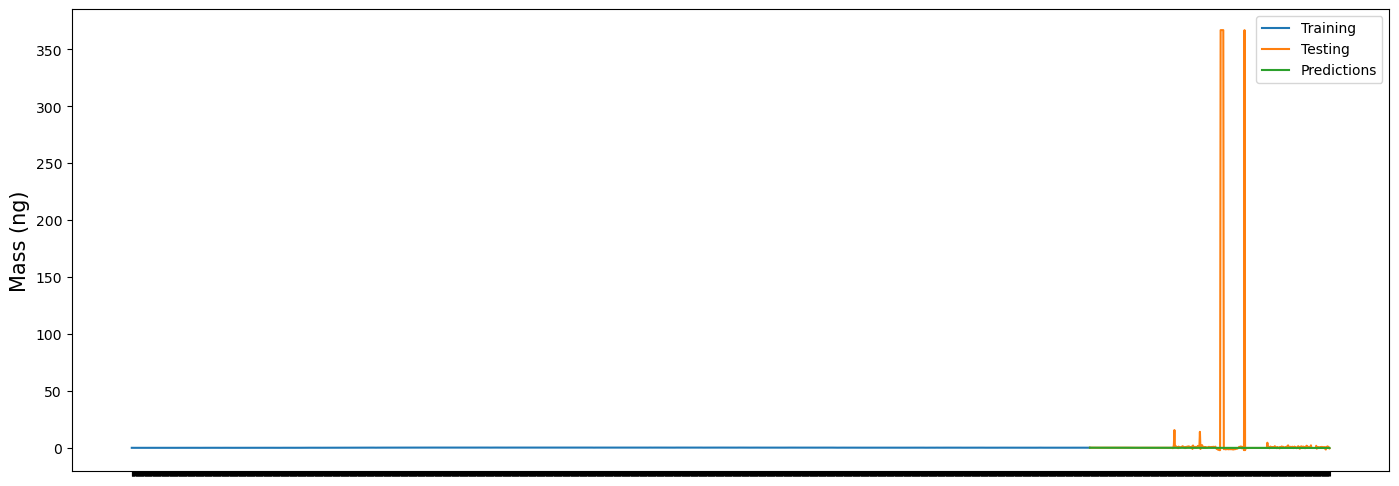

In [41]:
fig, ax = plt.subplots(figsize=(17,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [42]:
forecast = model_fit.forecast(steps=100)
forecast

1804    0.212005
1805    0.205851
1806    0.202431
1807    0.202074
1808    0.205759
          ...   
1899    0.156719
1900    0.160084
1901    0.153931
1902    0.150511
1903    0.150154
Length: 100, dtype: float64

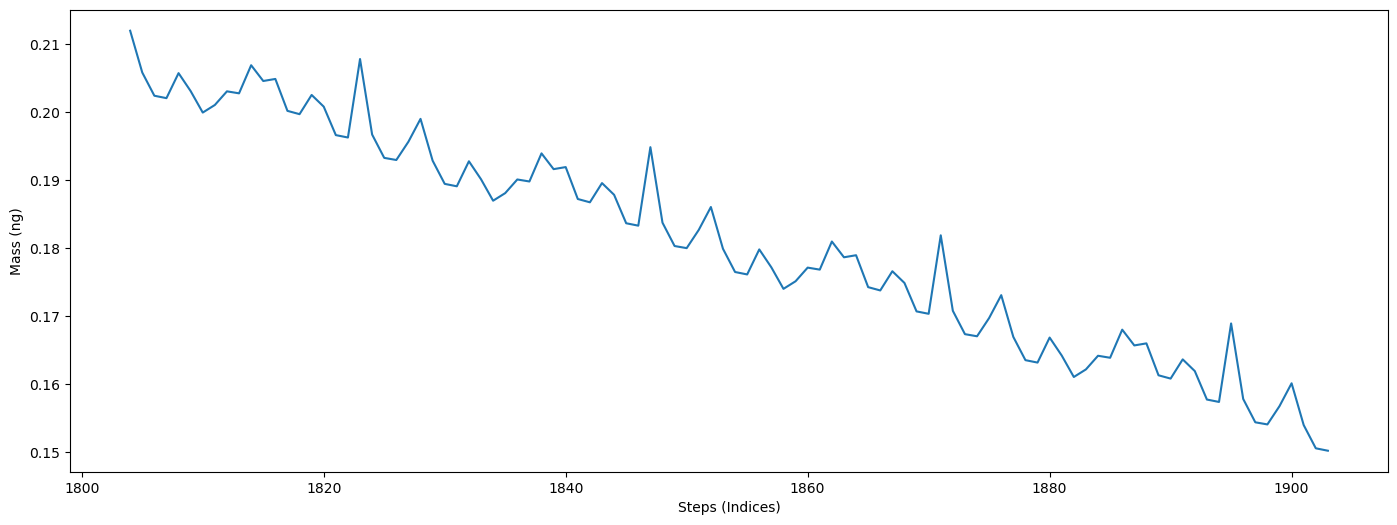

In [43]:
fig, ax = plt.subplots(figsize=(17,6)) 
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.show()

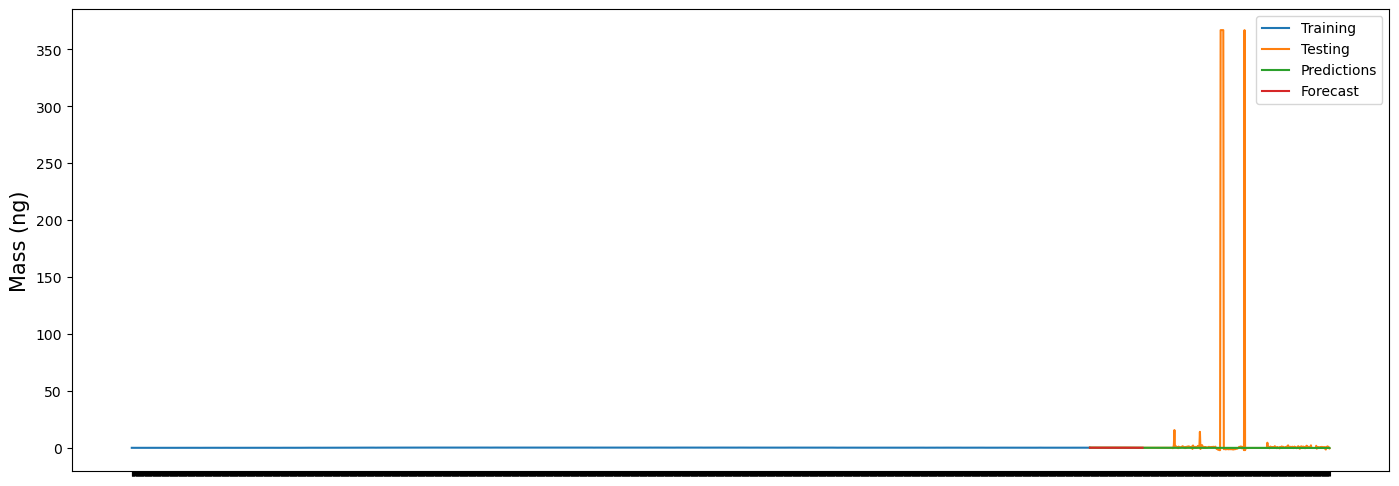

In [44]:
fig, ax = plt.subplots(figsize=(17,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

# 20180704

In [45]:
df704 = pd.read_csv('20180704.csv')

In [46]:
df704 = df704.rename(columns={'Time [h]': 'time', 'Mass [ng]': 'mass', 'Mean mass [ng]' : 'mean'})
df704 = df704.drop(['mean'], axis = 1)
df704 = df704.dropna()


In [47]:
df704['time'] = df704['time'].apply(decimal_to_hms)

In [48]:
df704.set_index('time', inplace=True)

In [49]:
train_size = int(len(df704) * 0.8)
train = df704[:train_size]
test = df704[train_size:]

In [50]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [51]:
# Create and fit the model
model = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='add')
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [52]:
predictions = model_fit.forecast(len(test))

In [53]:
# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


MSE: 3519.1932359573193, RMSE: 59.32278850456475


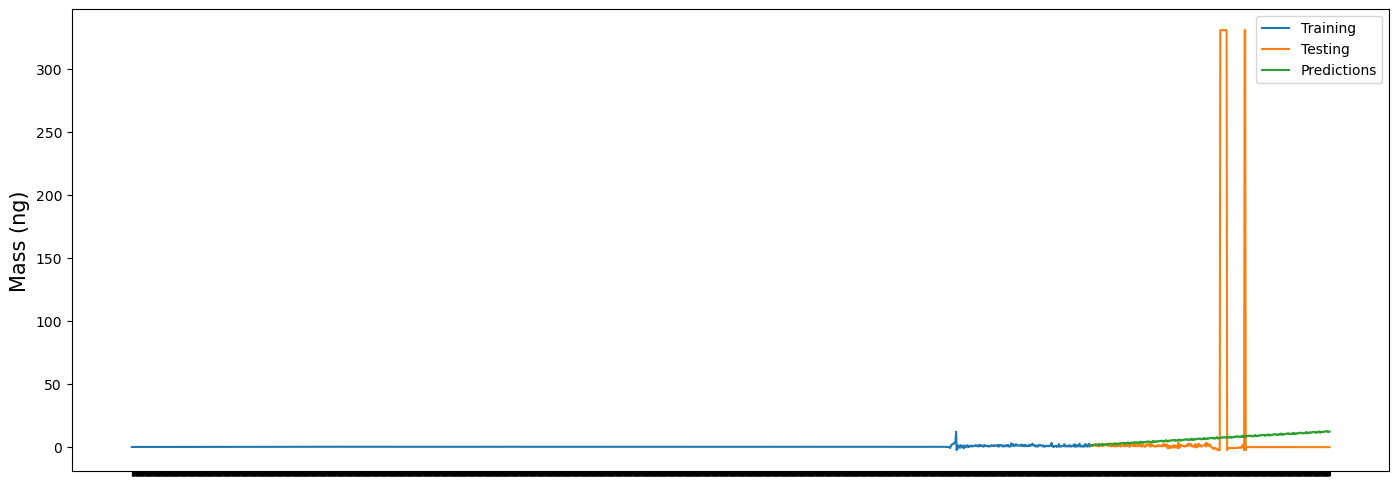

In [54]:
fig, ax = plt.subplots(figsize=(17,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [55]:
forecast = model_fit.forecast(steps=100)
forecast

1807    1.280751
1808    1.337832
1809    0.939688
1810    1.508427
1811    1.730912
          ...   
1902    4.358605
1903    3.609932
1904    3.667013
1905    3.268868
1906    3.837607
Length: 100, dtype: float64

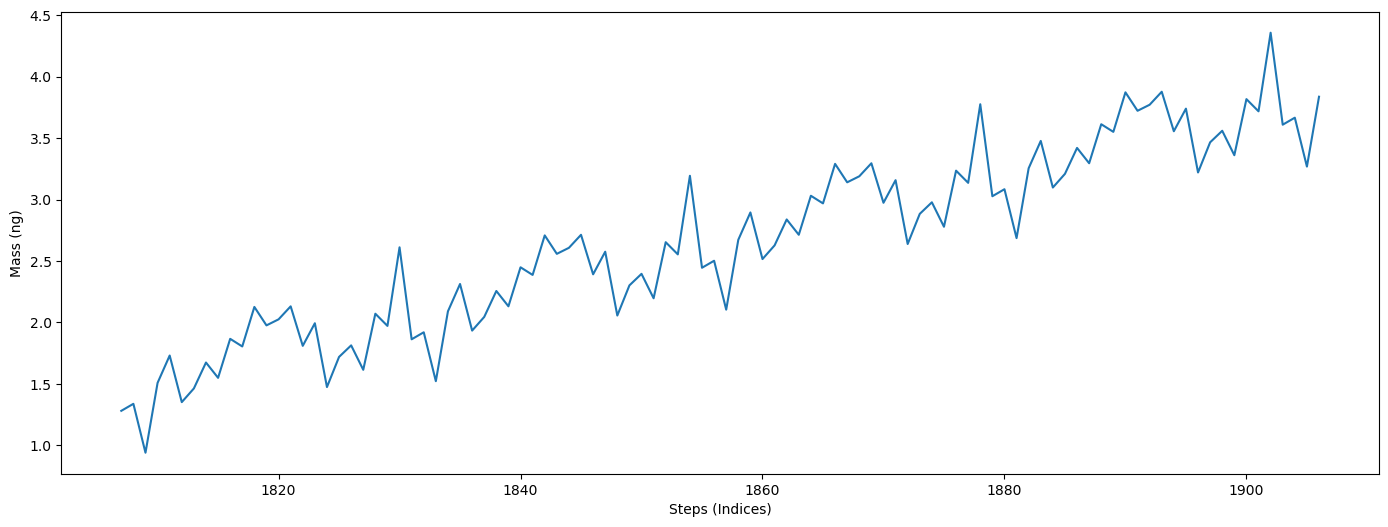

In [56]:
fig, ax = plt.subplots(figsize=(17,6)) 
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.show()

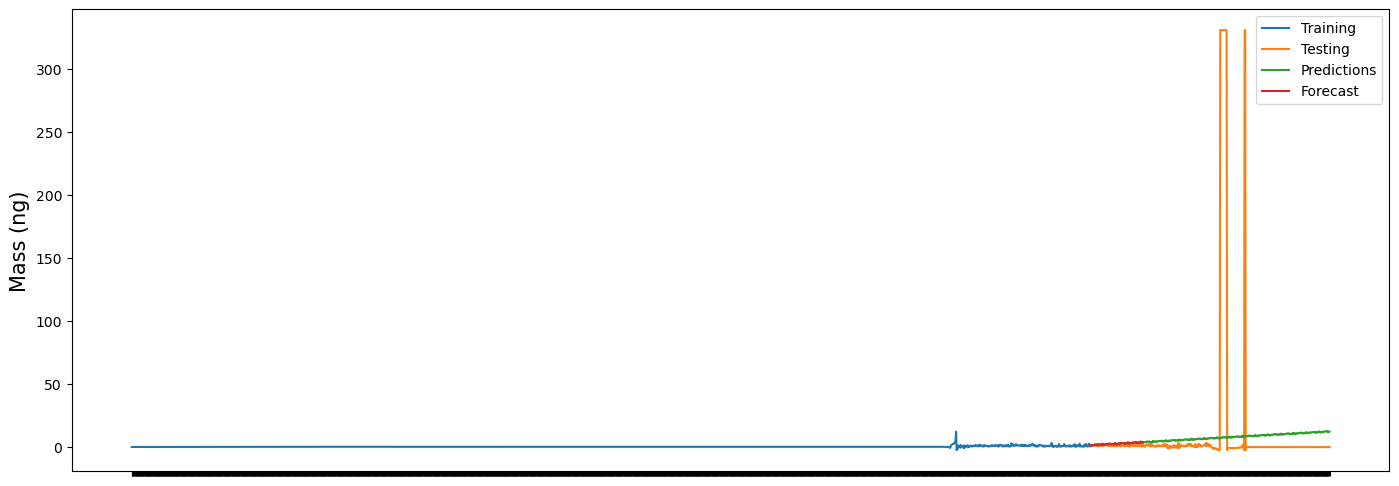

In [57]:
fig, ax = plt.subplots(figsize=(17,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

# 20200813 (Yeast 2)

Check for seasonality

In [58]:
df13Y2 = pd.read_csv('20200813Y2.csv')

In [59]:
df13Y2 = df13Y2.dropna()

In [60]:
df13Y2 = df13Y2[df13Y2['mass']>0]

In [61]:
sdc = df13Y2[['mass']].copy()

In [62]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 24)

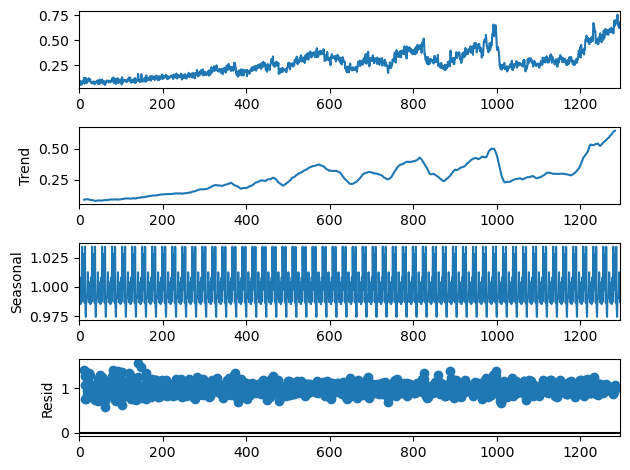

In [63]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

Forecasting

In [115]:
df13Y2 = pd.read_csv('20200813Y2.csv')

In [116]:
df13Y2 = df13Y2.dropna()

In [117]:
df13Y2['time'] = df13Y2['time'].apply(decimal_to_hms)

In [118]:
df13Y2.set_index('time', inplace=True)

In [119]:
train_size = int(len(df13Y2) * 0.83)
train = df13Y2[:train_size]
test = df13Y2[train_size:]

In [120]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [130]:
#Creating the model
model = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='add')

#Fitt the model to the training data
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [131]:
# Making predictions for the test data
predictions = model_fit.forecast(len(test))

In [132]:
# Evaluating the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


MSE: 0.010058232237547609, RMSE: 0.10029073854323543


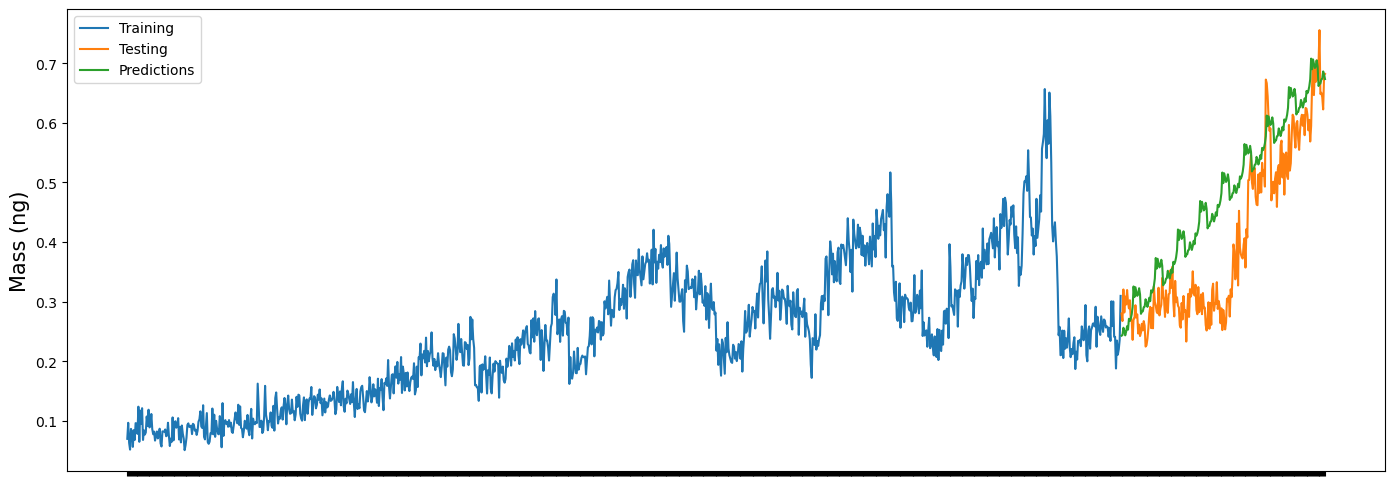

In [133]:
fig, ax = plt.subplots(figsize=(17,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [129]:
forecast = model_fit.forecast(steps=250)
forecast

1075    0.248767
1076    0.220311
1077    0.230921
1078    0.208691
1079    0.216430
          ...   
1320   -0.367043
1321   -0.373951
1322   -0.354832
1323   -0.357742
1324   -0.362512
Length: 250, dtype: float64

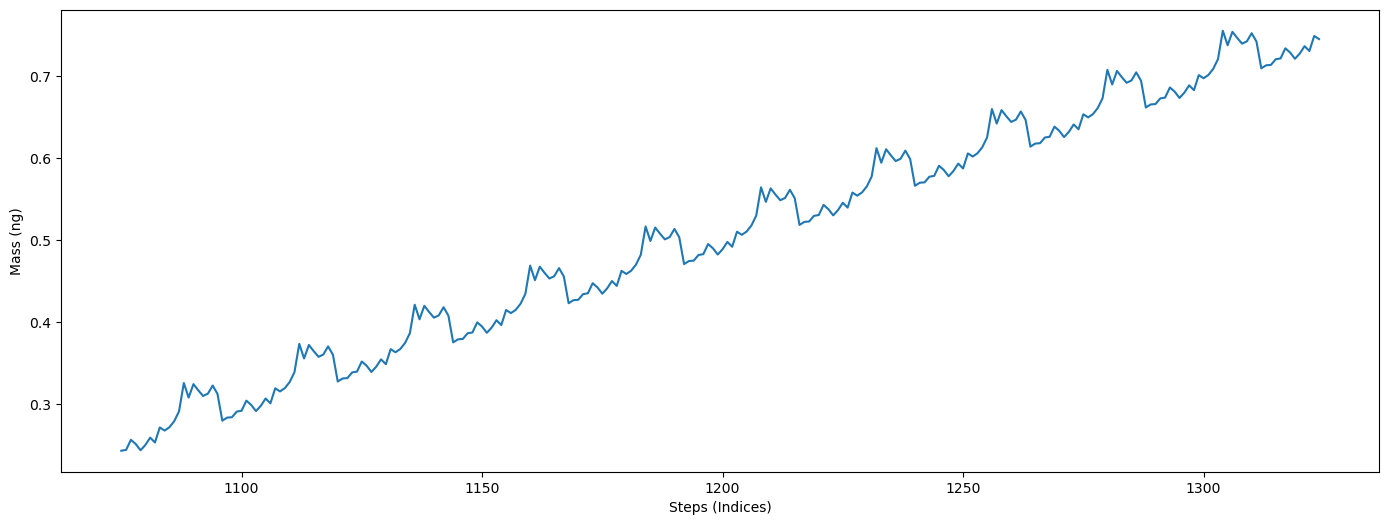

In [75]:
fig, ax = plt.subplots(figsize=(17,6)) 
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.show()

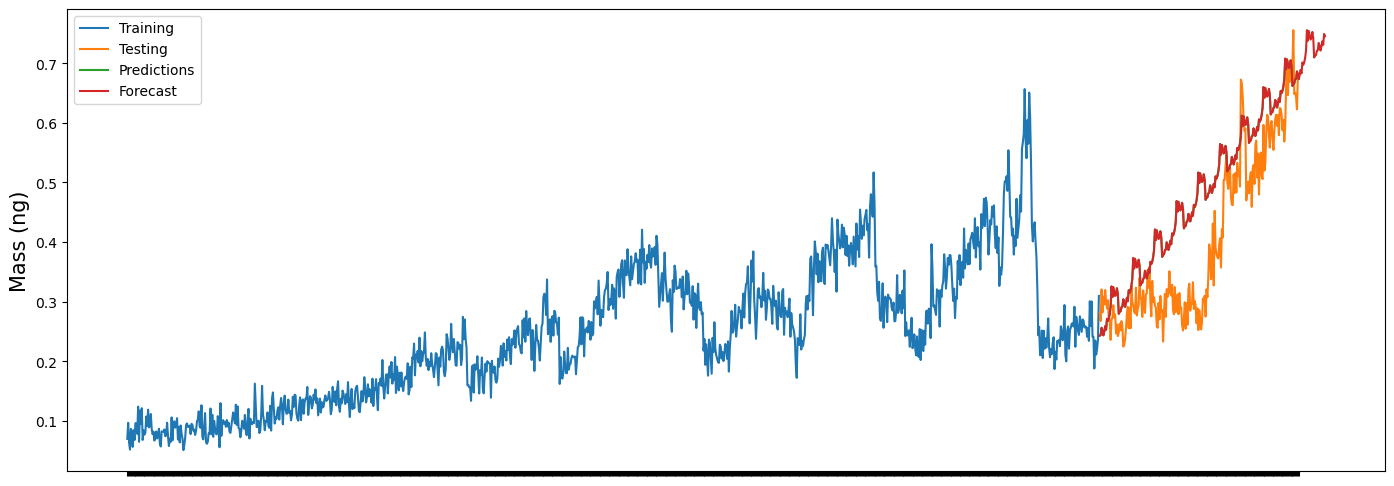

In [76]:
fig, ax = plt.subplots(figsize=(17,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

# 20200915

Check for seasonality

In [77]:
df15 = pd.read_csv('20200915.csv')

In [78]:
df15 = df15.dropna()

In [79]:
df15 = df15[df15['mass']>0]

In [80]:
sdc = df15[['mass']].copy()

In [81]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 25)

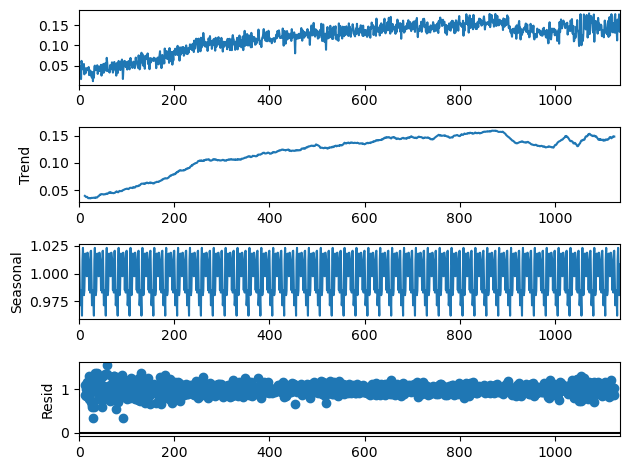

In [82]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

Forecasting

In [83]:
df15 = pd.read_csv('20200915.csv')

In [84]:
df15 = df15.dropna()

In [85]:
df15['time'] = df15['time'].apply(decimal_to_hms)

In [86]:
df15.set_index('time', inplace=True)

In [87]:
train_size = int(len(df15) * 0.87)
train = df15[:train_size]
test = df15[train_size:]

In [88]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [89]:
#Creating the model
model = ExponentialSmoothing(train, seasonal_periods=25, 
                             trend='add', seasonal='add')

#Fitting the model to the training data
model_fit = model.fit(smoothing_level=alpha, 
                      smoothing_trend=beta, smoothing_seasonal=gamma)


In [90]:
# Making predictions for the test data
predictions = model_fit.forecast(len(test))

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


MSE: 0.0003227178718714873, RMSE: 0.01796435002641307


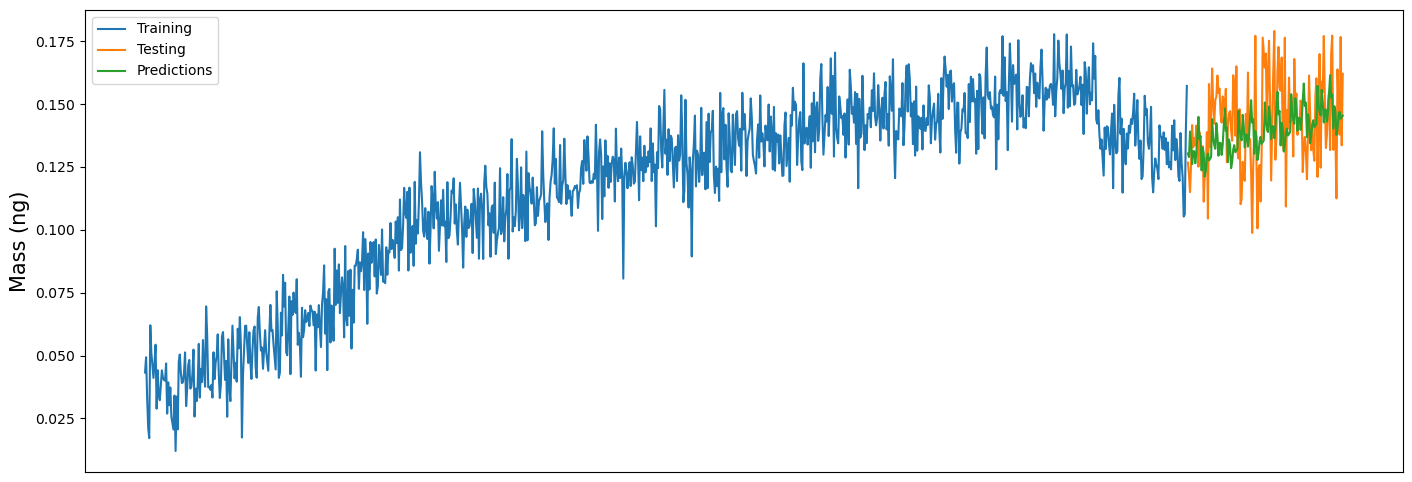

In [92]:
# Visualize the results
fig, ax = plt.subplots(figsize=(17,6)) 
ax.plot(train, label='Training')
ax.plot(test, label='Testing')
ax.plot(predictions, label='Predictions')
ax.set_ylabel('Mass (ng)', fontsize=15)
ax.tick_params(axis='x', which='both', length=0)
plt.gca().set_xticklabels([])
ax.legend()
plt.show()


In [93]:
forecast = model_fit.forecast(steps=200)
forecast

990     0.130382
991     0.128933
992     0.139110
993     0.134231
994     0.126133
          ...   
1185    0.150739
1186    0.151383
1187    0.152074
1188    0.167198
1189    0.159783
Length: 200, dtype: float64

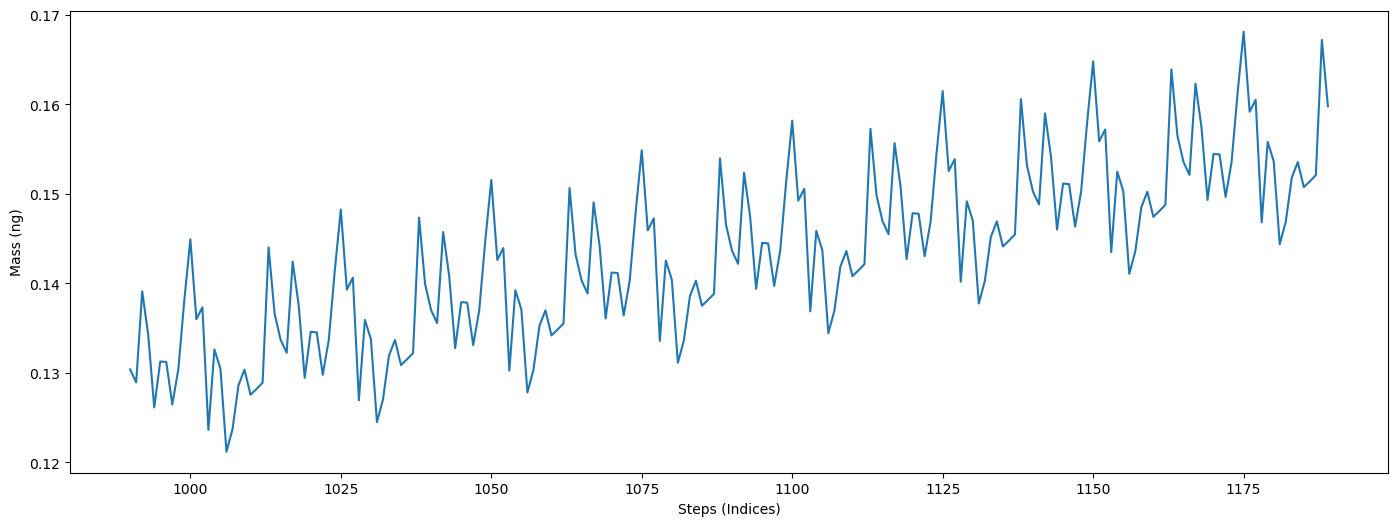

In [94]:
fig, ax = plt.subplots(figsize=(17,6))
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.show()

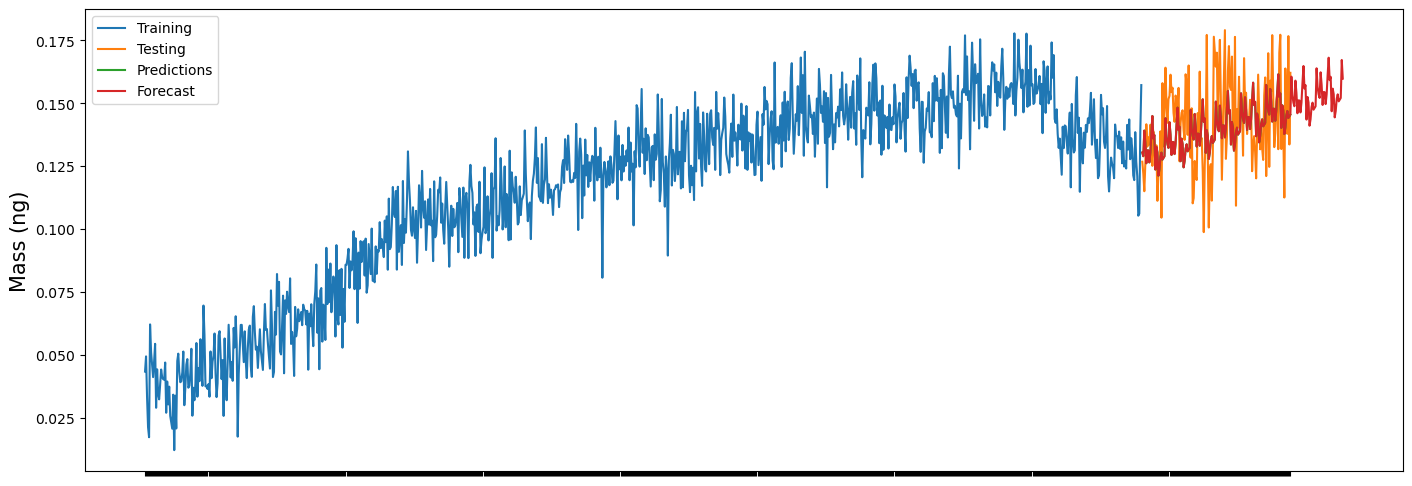

In [95]:
fig, ax = plt.subplots(figsize=(17,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

# 20201008 (Yeast 3)

Check for seasonality

In [96]:
df008Y3 = pd.read_csv('20201008Y3.csv')

In [97]:
df008Y3 = df008Y3.dropna()

In [98]:
df008Y3 = df008Y3[df008Y3['mass']>0]

In [99]:
sdc = df008Y3[['mass']].copy()

In [100]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 24)

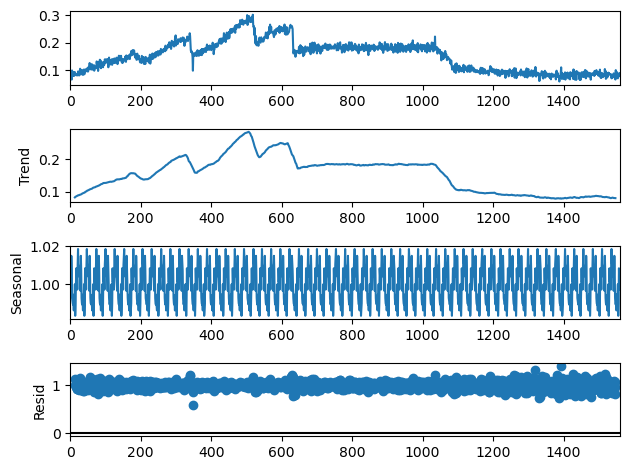

In [101]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();


Forecasting

In [134]:
df008Y3 = pd.read_csv('20201008Y3.csv')

In [135]:
df008Y3 = df008Y3.dropna()

In [136]:
df008Y3['time'] = df008Y3['time'].apply(decimal_to_hms)

In [137]:
df008Y3.set_index('time', inplace=True)

In [138]:
train_size = int(len(df008Y3) * 0.89)
train = df008Y3[:train_size]
test = df008Y3[train_size:]

In [139]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [162]:
# Creating the model
model = ExponentialSmoothing(train, seasonal_periods=23, trend='add', seasonal='add')

# Fitting the model to the training data
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [163]:
# Making predictions for the test data
predictions = model_fit.forecast(len(test))

In [164]:
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 0.00011705028839610698, RMSE: 0.01081897815859275


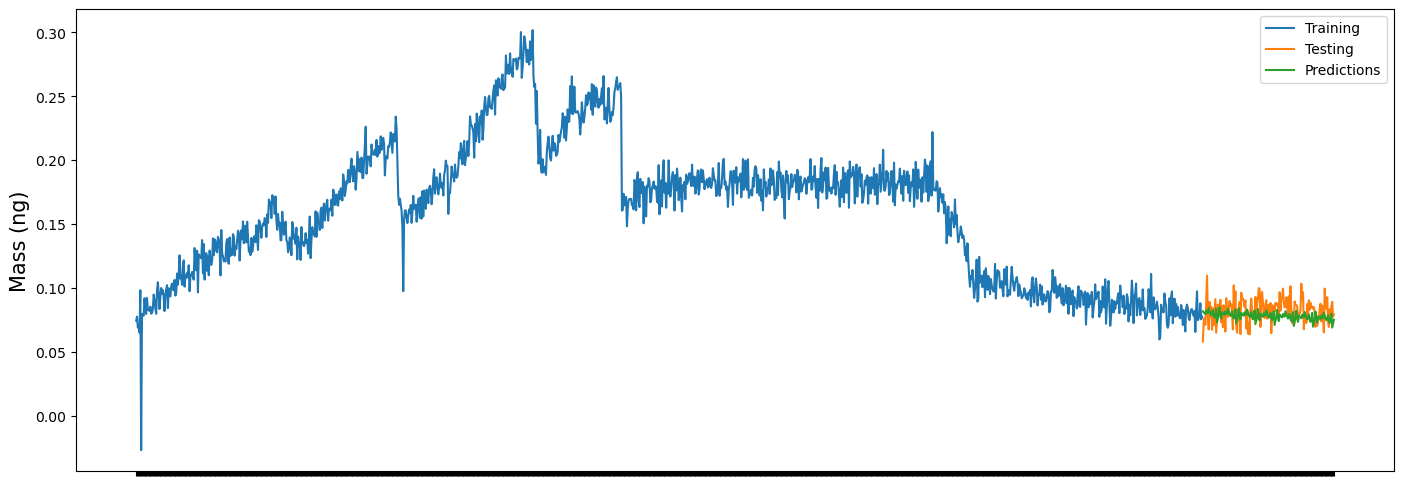

In [165]:
fig, ax = plt.subplots(figsize=(17,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [166]:
forecast = model_fit.forecast(steps=200)
forecast

1278    0.081779
1279    0.080869
1280    0.080263
1281    0.079605
1282    0.082366
          ...   
1473    0.074589
1474    0.077223
1475    0.073137
1476    0.071490
1477    0.073716
Length: 200, dtype: float64

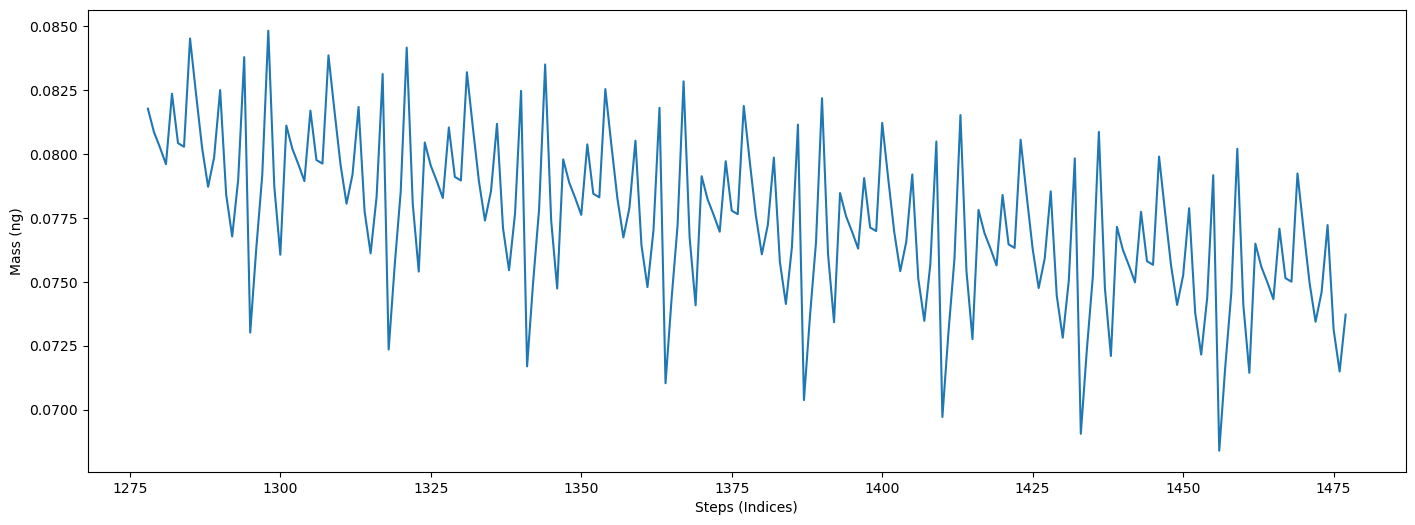

In [167]:
fig, ax = plt.subplots(figsize=(17,6)) 
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.show()

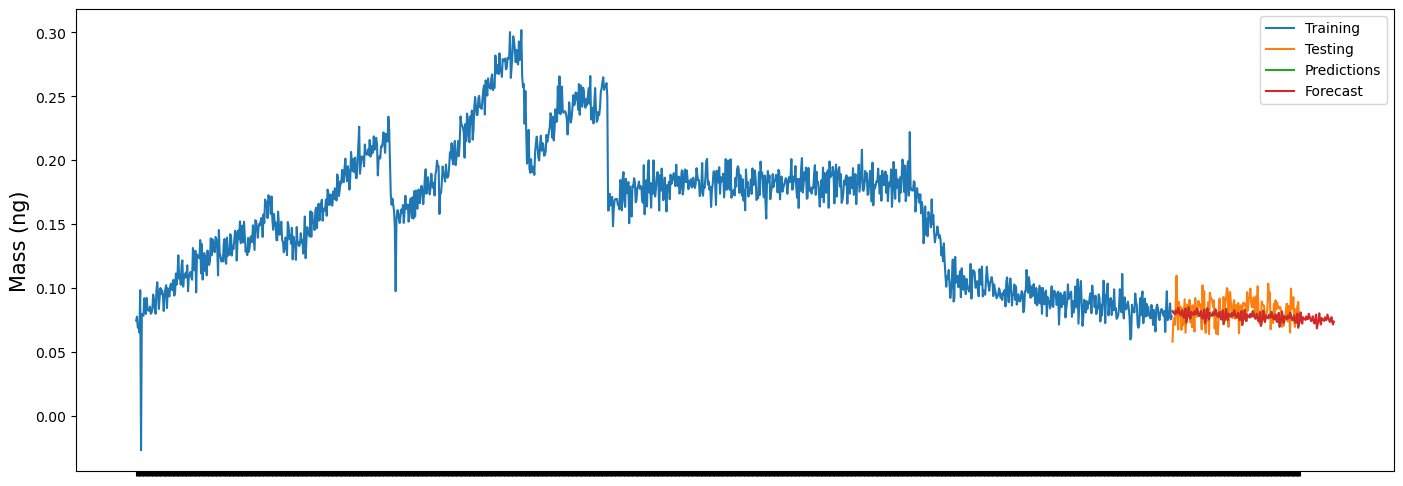

In [168]:
fig, ax = plt.subplots(figsize=(17,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()